In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

2026-02-14 07:24:17.775619: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771053858.016321      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771053858.086173      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771053858.673160      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771053858.673237      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771053858.673240      17 computation_placer.cc:177] computation placer alr

In [2]:
data = pd.read_csv('/kaggle/input/taiwan-wright-and-weight-sampling-data/2017_2020_bmi.csv')

In [3]:
data.head()

,yr,height,weight,bmi,gender
0,0,69.96,10.29,21.02,1
1,0,71.69,10.89,21.19,1
2,0,68.54,10.93,23.27,1
3,0,69.69,9.38,19.31,1
4,0,71.30,7.93,15.59,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7770 entries, 0 to 7769
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yr      7770 non-null   object 
 1   height  7770 non-null   float64
 2   weight  7770 non-null   float64
 3   bmi     7770 non-null   float64
 4   gender  7770 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 303.6+ KB


In [5]:
print(data['gender'].value_counts())

gender
0    3891
1    3879
Name: count, dtype: int64


In [6]:
X = data[['height','weight','bmi']].values
y = data['gender'].values

In [7]:
X

array([[ 69.96,  10.29,  21.02],
       [ 71.69,  10.89,  21.19],
       [ 68.54,  10.93,  23.27],
       ...,
       [151.99,  57.56,  24.91],
       [151.58,  57.24,  24.91],
       [151.66,  57.35,  24.94]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = Sequential([
    Dense(8, input_dim=3, activation='relu'),   # Hidden layer 1
    Dense(4, activation='relu'),                # Hidden layer 2
    Dense(1, activation='sigmoid')             # Output layer for binary classification
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-14 07:24:35.478973: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

In [12]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=500,
    batch_size=50,
    verbose=1
)

Epoch 1/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6813 - loss: 0.5927 - val_accuracy: 0.8346 - val_loss: 0.2609
Epoch 2/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8488 - loss: 0.2378 - val_accuracy: 0.8449 - val_loss: 0.2341
Epoch 3/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8610 - loss: 0.2237 - val_accuracy: 0.8468 - val_loss: 0.2315
Epoch 4/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8617 - loss: 0.2216 - val_accuracy: 0.8462 - val_loss: 0.2373
Epoch 5/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8617 - loss: 0.2193 - val_accuracy: 0.8507 - val_loss: 0.2316
Epoch 6/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8605 - loss: 0.2136 - val_accuracy: 0.8462 - val_loss: 0.2287
Epoch 7/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8602 - loss: 0.2141 - val_accuracy: 0.8494 - val_loss: 0.2283
Epoch 8/500
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8528 - loss: 0.2097 - val_accu

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8709 - loss: 0.2118
Test Loss: 0.2141, Test Accuracy: 0.8649


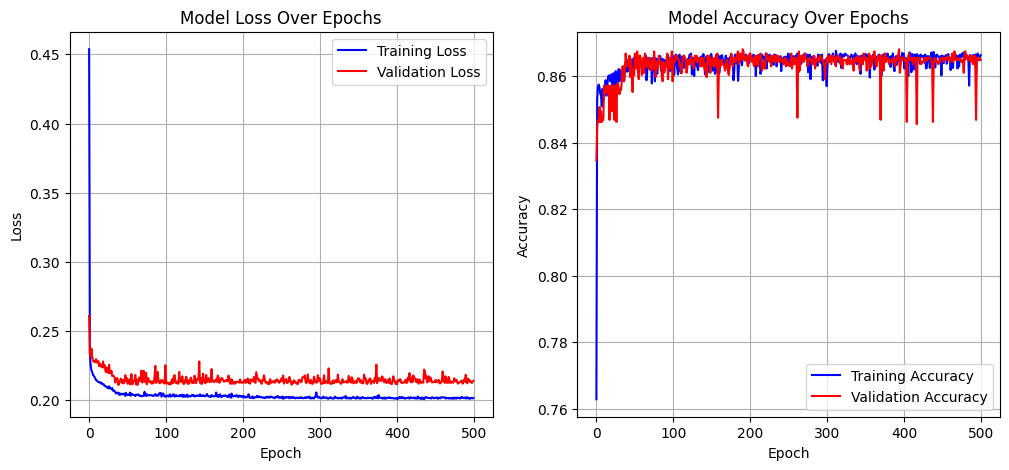

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()